# Исследование причин убыточности развлекательного приложения Procrastinate Pro+

- Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

--- 

- Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
  - лог сервера с данными об их посещениях,
  - выгрузка их покупок за этот период,
  - рекламные расходы.

**Описание данных:**

В нашем распоряжении три датасета. Файл **visits_info_short.csv** хранит лог сервера с информацией о посещениях сайта, **orders_info_short.csv** — информацию о заказах, а **costs_info_short.csv** — информацию о расходах на рекламу.

---

Структура ***visits_info_short.csv:***

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

---

Структура ***orders_info_short.csv:***

- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

---

Структура ***costs_info_short.csv:***

- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

 **План работы:**

1. Загрузить данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные. Выполнить обзор данных и предобработку данных.


2. Описать функции для расчетов бизнес-показателей


3. Проведение исследовательского анализа данных (анализ профилей пользователей).


4. Исследование маркетинговых показателей.


5. Оценка окупаемости рекламы.


6. Написать общий вывод.

# 1. Загрузка данных и подготовка их к анализу

Загрузить данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. 
- заказы: `/datasets/orders_info_short.csv`. 
- расходы: `/datasets/costs_info_short.csv`. 

# Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
# загрузка данных (посещения, заказы, расходы на рекламу)

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
# просмотр данных

for i in (visits, orders, costs):
    display(i.head())
    display(i.info())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

**Вывод:**

1. Необходимо изменить тип данных колоннок с датами на соответствующий datetime;

2. Названия столбцов привести к "snake_case".

# Предобработка данных

In [4]:
 # преобразование данных о времени
    
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [5]:
for i in (visits, orders, costs):
    
    i.columns = [x.lower().replace(' ', '_') for x in i.columns.values] # приведение название столбцов к "snake_case"
    
    display(i.isna().sum()) # проверка на пропуски
    
    print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m',i.duplicated().sum()) # проверка на явные дубликаты
    
    display(i.info()) # проверка результата

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Количество дубликатов в таблице: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

user_id     0
event_dt    0
revenue     0
dtype: int64

Количество дубликатов в таблице: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

dt         0
channel    0
costs      0
dtype: int64

Количество дубликатов в таблице: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [6]:
# проверим данные на неявные дубликаты 

print('\033[1m' + 'Количество неявных дубликатов в таблице:' + '\033[0m', visits.duplicated(['user_id', 'session_start']).sum())

print('\033[1m' + 'Количество неявных дубликатов в таблице:' + '\033[0m', orders.duplicated(['user_id', 'event_dt']).sum())

print('\033[1m' + 'Количество неявных дубликатов в таблице:' + '\033[0m', costs.duplicated(['dt', 'channel']).sum())

Количество неявных дубликатов в таблице: 0
Количество неявных дубликатов в таблице: 0
Количество неявных дубликатов в таблице: 0


**Выводы по 1 разделу:**

Данные были подготовлены к дальнейшему исследованию:

- Была проведена проверка на пропуски, пропуски отсутствуют;

- Название столбцов приведено к "snake_case".

- Изменили тип данных колоннок с датами на соответствующий;

- Провели проверку на явные дубликаты - явных дубликатов не обнаружено;

- Провели проверку на неявные дубликаты - неявных дубликатов нет.

# 2.  Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

# Функции для вычисления значений метрик 

##### **Функция для создания профилей пользователей**

In [7]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Функция для подсчёта Retention Rate

In [8]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция для подсчёта конверсии

In [9]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция для подсчёта LTV и ROI

In [10]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

# Функции для построения графиков

##### Функция для сглаживания данных

In [11]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### Функция для построения графика Retention Rate

In [12]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### Функция для построения графика конверсии

In [13]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### Функция  для визуализации LTV и ROI

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Выводы по 2 разделу:**

Для проведения исследования были заданы 8 функций:

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

# 3. Исследовательский анализ данных

# Профили пользователей. Минимальная и максимальная даты привлечения пользователей

In [15]:
# профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [16]:
# минимальная и максимальная дата привлечения пользователей

print(f'Минимальная дата привлечения пользователей: {profiles["dt"].min()}')
print(f'Максимальная дата привлечения пользователей: {profiles["dt"].max()}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


 - По информации из описания данных - у нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Информация из описания данных соответствует действительности. 

**Вывод:**

Составлены пользовательские профили, которые содержат следующую информацию: 

- **first_ts** - дату  первого привлечения каждого пользователя
- **channel** - канал привлечения
- **device** - устройство
- **region** - регион
- **payer** - стал ли пользователь покупателем
- **acquisition_cost** - стоимость привлечения клиента (organic: стоимость равна нулю)

1) минимальная дата привлечения пользователей: 01.05.2019

2) максимальная дата привлечения пользователей: 27.10.2019

- По информации из описания данных - у нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Информация из описания данных соответствует действительности. 


# Анализ пользователей по странам

In [17]:
# функция для анализа пользователей

def analyze_column(profiles, column_name):
    result = (   
    profiles.groupby(column_name)
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id': 'users'})    
    .style
    .format({'payer': '{:.2%}'})
  )
    return result

In [18]:
# из каких стран пользователи приходят в приложение

print(profiles.region.unique())

['United States' 'France' 'Germany' 'UK']


In [19]:
# таблица, отражающая количество пользователей и долю платящих из каждой страны.

analyze_column(profiles, 'region')

,users,payer
region,,
United States,100002,6.90%
Germany,14981,4.11%
UK,17575,3.98%
France,17450,3.80%


**Вывод:**

- в приложение приходят пользователи из США, Франции, Германии и Великобритании;

- подавляющее число пользователей из США;

- самая высокая доля платящих пользователей тоже из США.

# Анализ пользователей по устройствам

In [20]:
# какими устройствами пользуются клиенты

print(profiles.device.unique())

['Mac' 'iPhone' 'PC' 'Android']


In [21]:
# таблица, отражающая количество пользователей и долю платящих для каждого устройства

analyze_column(profiles, 'device')

,users,payer
device,,
Mac,30042,6.36%
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%


**Вывод:**

- клиенты пользуются Mac, iPhone, PC, 'Android'.

- большинство пользователей предпочитают iPhone;

- доля платящих пользователей выше у владельцев Mac.

# Анализ пользователей по рекламным каналам

In [22]:
# рекламные источники привлечения

print(profiles.channel.unique())

['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [23]:
# таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения

analyze_column(profiles, 'channel')

,users,payer
channel,,
FaceBoom,29144,12.20%
AdNonSense,3880,11.34%
lambdaMediaAds,2149,10.47%
TipTop,19561,9.60%
RocketSuperAds,4448,7.91%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%
MediaTornado,4364,3.57%
LeapBob,8553,3.06%


**Вывод:**

- всего рекламных каналов 11, включая organic (пользователи, которые пришли без рекламы);

- большинство пользователей первый раз пришли без рекламы, однако доля платящих у них самая низкая;

- самая высокая доля платящих у пользователей привлеченных через каналы FaceBoom, AdNonSense, lambdaMediaAds.

**Выводы по 3 разделу:**

***1. Составлены пользовательские профили, которые содержат следующую информацию:*** 

- first_ts - дату  первого привлечения каждого пользователя
- channel - канал привлечения
- device - устройство
- region - регион
- payer - стал ли пользователь покупателем
- acquisition_cost - стоимость привлечения клиента (organic: стоимость равна нулю)

- **минимальная дата привлечения пользователей: 01.05.2019**

- **максимальная дата привлечения пользователей: 27.10.2019**
 

- По информации из описания данных - у нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Информация из описания данных соответствует действительности. 
 
---
***2. Проанализированы пользователи по странам:***

- в приложение приходят пользователи из США, Франции, Германии и Великобритании;

- подавляющее число пользователей из США;

- самая высокая доля платящих пользователей тоже из США.

---

***3. Проанализированы пользователи по устройствам:***

- клиенты пользуются Mac, iPhone, PC, 'Android'.

- большинство пользователей предпочитают iPhone;

- доля платящих пользователей выше у владельцев Mac.

---

***4. Проанализированны пользователи по каналам привлечения:***


- всего рекламных каналов 11, включая organic (пользователи, которые пришли без рекламы);

- большинство пользователей первый раз пришли без рекламы, однако доля платящих у них самая низкая;

- самая высокая доля платящих у пользователей привлеченных через каналы FaceBoom, AdNonSense, lambdaMediaAds.

# 4. Маркетинг

# Общая сумма расходов на маркетинг

In [24]:
costs['costs'].sum()

105497.30000000002

**Вывод:**

- всего на рекламу потрачено 105497 y.e

# Распределение трат по рекламным источникам

In [25]:
total_costs = costs['costs'].sum()

(
    costs.groupby('channel').agg({'costs':'sum'})
    .sort_values(by='costs', ascending=False)
    .assign(payer=lambda x: x['costs'] / total_costs)
    .style
    .format({'costs': '{:.2f}', 'payer': '{:.2%}'})
)

,costs,payer
channel,,
TipTop,54751.30,51.90%
FaceBoom,32445.60,30.75%
WahooNetBanner,5151.00,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833.00,1.74%
LeapBob,1797.60,1.70%
lambdaMediaAds,1557.60,1.48%
MediaTornado,954.48,0.90%


**Вывод:**

- самые дорогие каналы привлечения TipTop и FaceBoom.

# Визуализация динамики изменения расходов во времени  по каждому источнику

In [26]:
# добавим столбцы с месяцем и номером недели в датафрейм с расходами на рекламу

costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

display(costs.head())

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


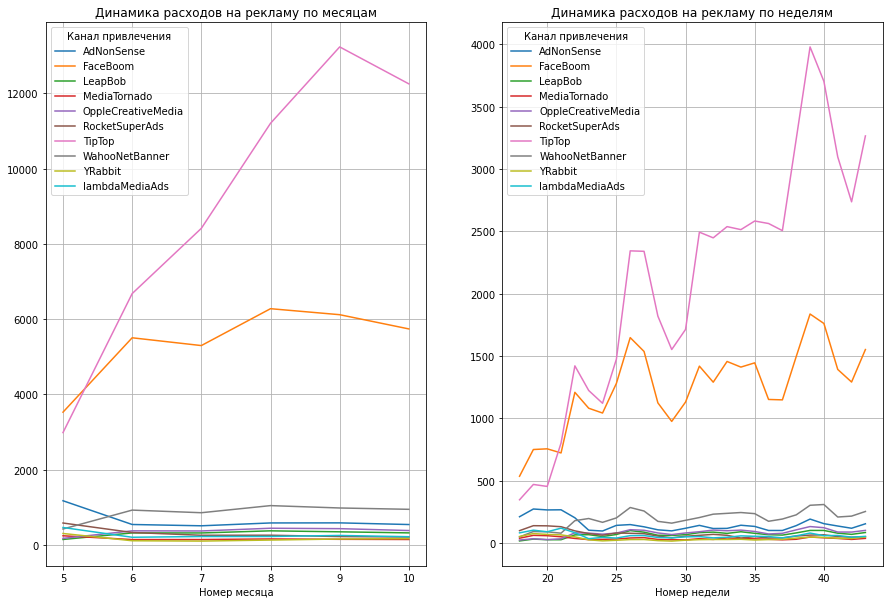

In [27]:
# строим сводные таблицы 
costs_months = (
    costs
    .pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
)

costs_weeks = (
    costs
    .pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
)

# строим графики по месяцам и неделям

plt.figure(figsize=(15,10))
costs_months.plot(use_index=True, grid=True, ax=plt.subplot(1,2,1))
plt.title('Динамика расходов на рекламу по месяцам')
plt.xlabel('Номер месяца')
plt.legend(title='Канал привлечения')

costs_weeks.plot(use_index=True, grid=True, ax=plt.subplot(1,2,2))
plt.title('Динамика расходов на рекламу по неделям')
plt.xlabel('Номер недели')
plt.legend(title='Канал привлечения')
plt.show()


**Вывод:**

- начиная с 20 - 21 недели (май) началось увеличение расходов по каналам TipTop и FaceBoom;

- пик расходов приходится на 38 - 39 неделю (сентябрь);

- у остальных каналов резких скачков расходов на рекламу не наблдается.

# Расчет САС для каждого рекламного источника 

In [28]:
# рассчитаем САС для каждого рекламного источника 

cac_channel = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean') \
                      .sort_values(by='acquisition_cost', ascending=False) \
                      .rename(columns={'acquisition_cost':'cac'}) \
                      .reset_index()
cac_channel['cac'] = cac_channel['cac'].round(2)
cac_channel

,channel,cac
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


**Вывод:**

- самый дорогой канал по привлечению пользователей TipTop: стоимость привлечения одного пользователя 2.80 y.e;

- на втором и третьем месте каналы FaceBoom и AdNonSense: стоимость привлечения одного пользователя 1.11 и 1.01 y.e соотвественно;

- остальные каналы берут от 0.72 до 0.21 y.e;

- organic: бесплатный трафик, его стоимость равна нулю.

**Выводы по 4 разделу:**

***1. Рассчитана общая сумма расходов на маркетинг:*** 

- всего на рекламу потрачено 105497 y.e
 
---
***2. Выяснено, как траты распределены по рекламным источникам:***

- самые дорогие каналы привлечения TipTop и FaceBoom.

---

***3.  Визуализирована динамика изменения расходов во времени по каждому источнику:***

- начиная с 20 - 21 недели (май) началось увеличение расходов по каналам TipTop и FaceBoom;

- пик расходов приходится на 38 - 39 неделю (сентябрь);

- у остальных каналов резких скачков расходов на рекламу не наблдается.

---

***4. Рассчитан САС для каждого рекламного источника:***

- самый дорогой канал по привлечению пользователей TipTop: стоимость привлечения одного пользователя 2.80 y.e;

- на втором и третьем месте каналы FaceBoom и AdNonSense: стоимость привлечения одного пользователя 1.11 и 1.01 y.e соотвественно;

- остальные каналы берут от 0.72 до 0.21 y.e;

- organic: бесплатный трафик, его стоимость равна нулю.


# 4. Оценка окупаемости рекламы

# Общая окупаемость рекламы

In [29]:
# установим момент и горизонт анализа данных

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [30]:
# исключаем органических пользователей в профилях

profiles_no_organic= profiles.query('channel != "organic"')

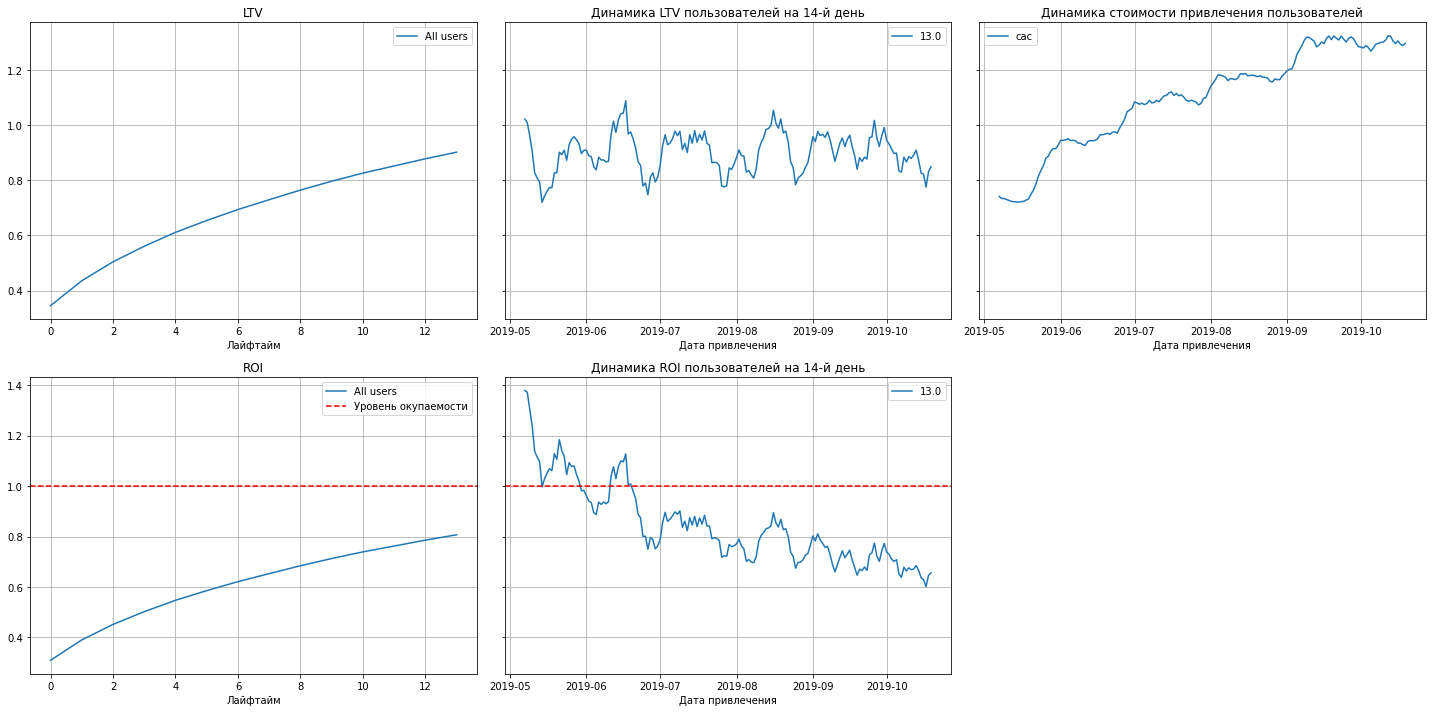

In [31]:
# считаем LTV и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no_organic, orders, observation_date, horizon_days)

# строим графики

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:**
- LTV стабилен в динамике и растет с увеличением лайфтаймов;

- CAC не стабилен и растет скачкообразно, значит увеличивается рекламный бюджет;

- Реклама не окупается так как ROI к концу второй недели около 80%;

- До середины июня реклама окупалась, далее ROI начал падать и в ноябре показатели достиги 60 %.

# Конверсия и удержание пользователей

##### Конверсия пользователей

In [32]:
# исключаем органических пользователей в заказах

organic_ids = list(profiles.loc[profiles['channel'] == 'organic', 'user_id'])
orders_no_organic= orders.query('user_id != @organic_ids')

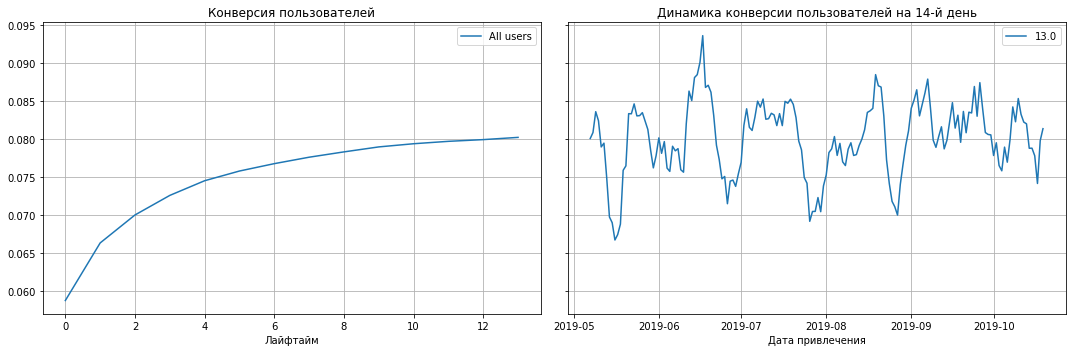

In [33]:
# рассчет конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders_no_organic, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**
- Конверсия растет с лайфтаймами, в динамике по месяцам нет ничего необычного.

##### Удержание пользователей

In [34]:
# исключаем органических пользователей в визитах

visits_no_organic = visits.query('user_id != @organic_ids')

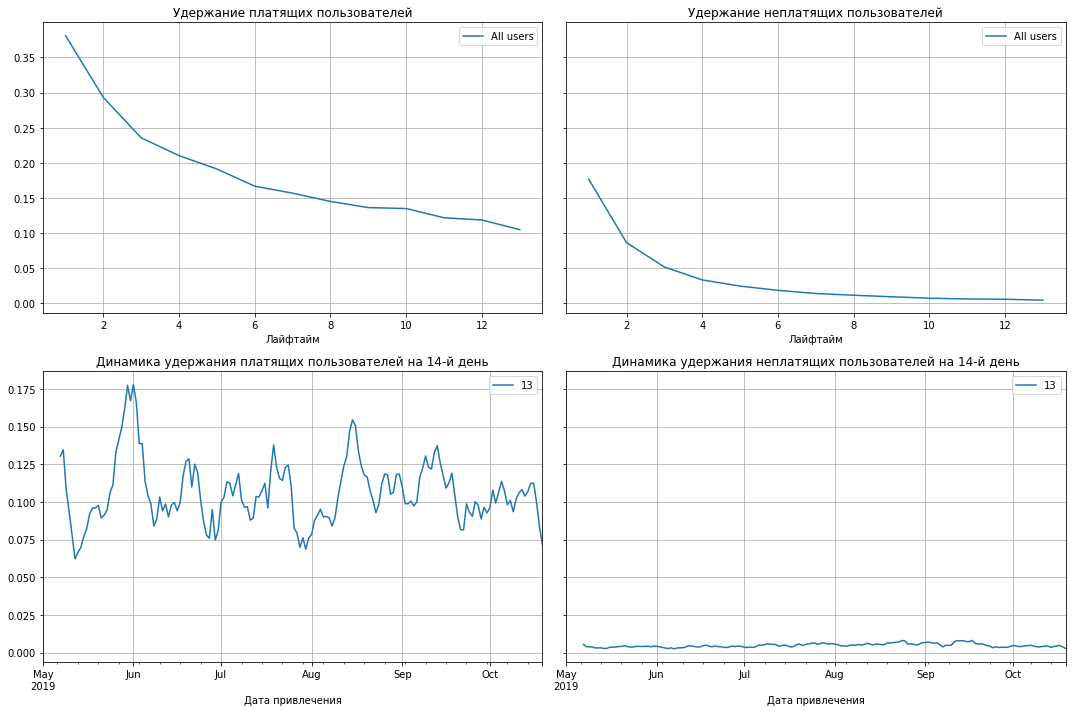

In [35]:
# рассчет удержания

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits_no_organic, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**
- кривая платящих пользователей выше, чем кривая неплатящих;

- кривые постепенно снижаются;

- в динамике по месяцам нет ничего необычного.

# Окупаемость рекламы с разбивкой по устройствам

##### LTV и ROI

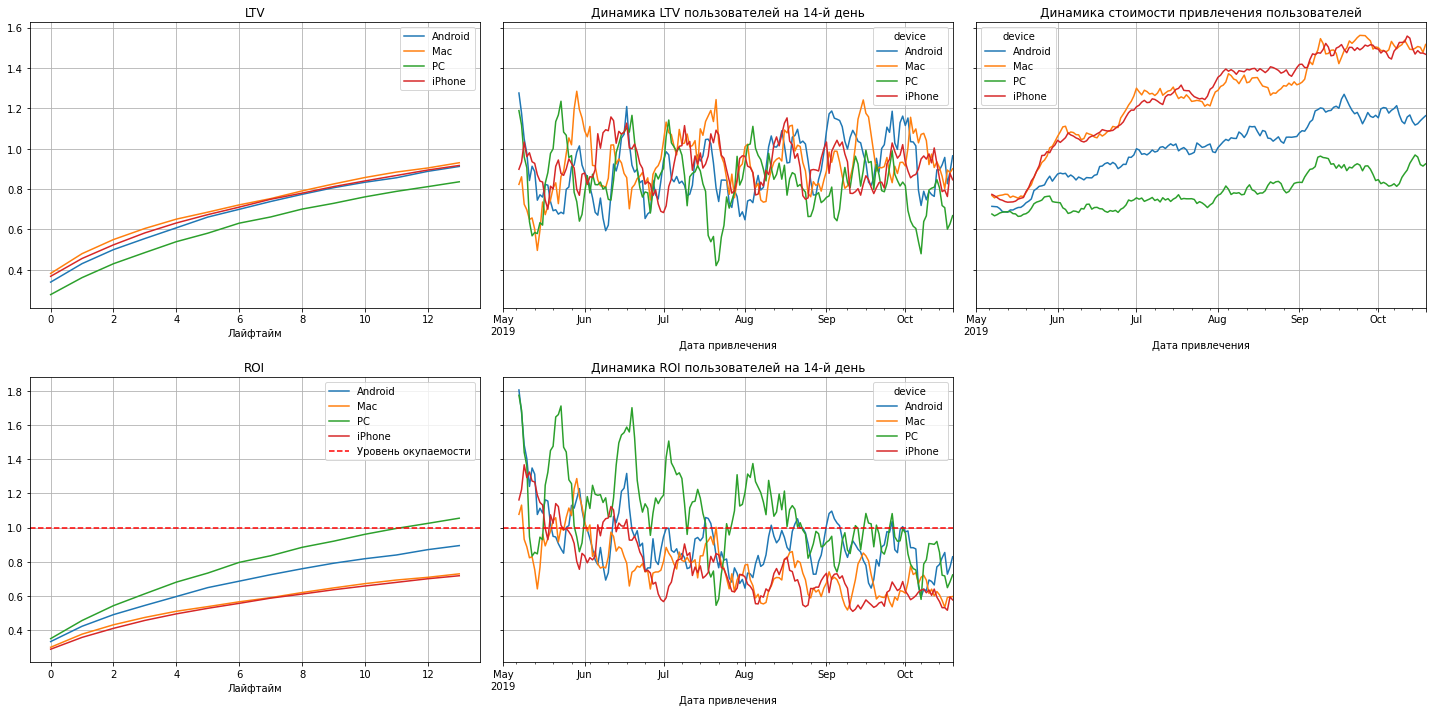

In [36]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

**Вывод:**

- пользователи PC окупаются на 11 день, при этом на них тратится меньше всего рекламного бюджета;

- хуже всех окупаются владельцы Mac и iPhone;

- показатель LTV стабилен для всех устройств;

- динамика ROI пользователей на 14-й день к октябрю снижается для всех устройств ниже 100 %.

##### Конверсия по устройствам

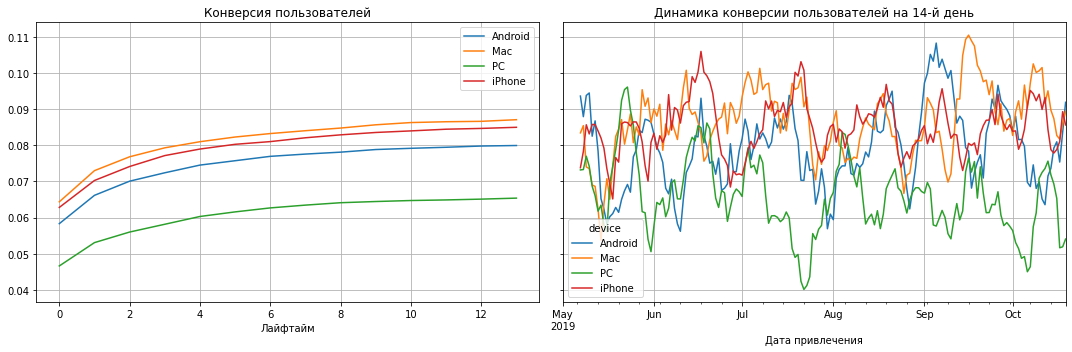

In [37]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders_no_organic, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**

- лучше всего конверсия растет у Mac и iPhone.

##### Удержание по устройствам

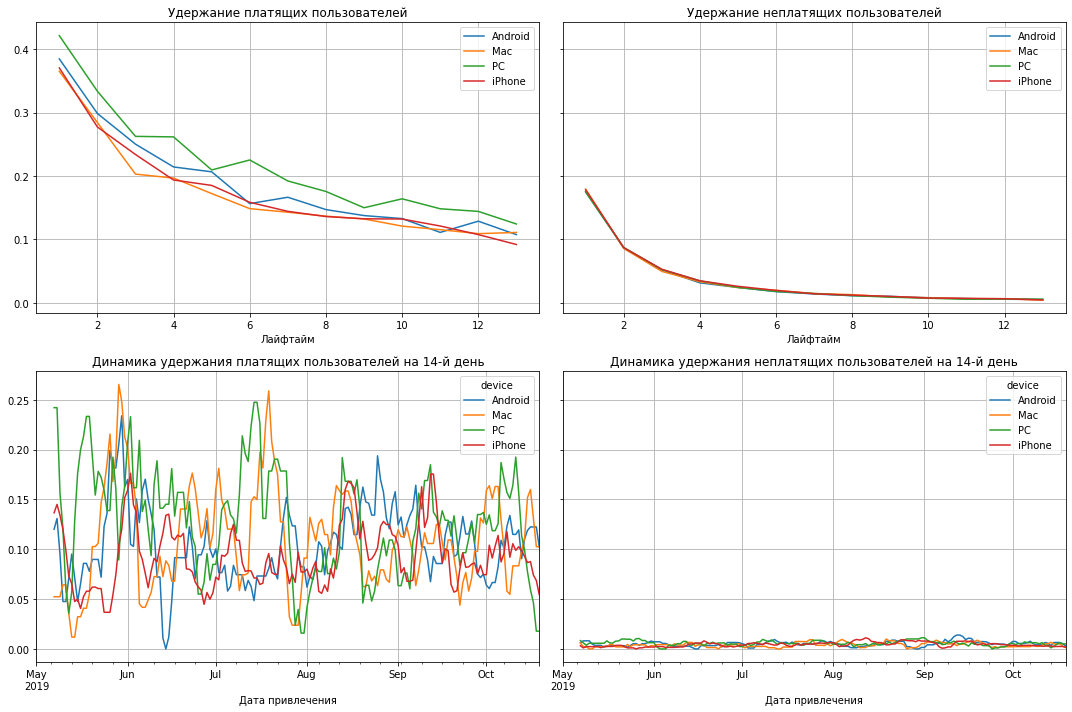

In [38]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits_no_organic, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**

- в динамике по лайфтаймам и месяцам нет ничего необычного.

# Oкупаемость рекламы с разбивкой по странам

##### LTV и ROI

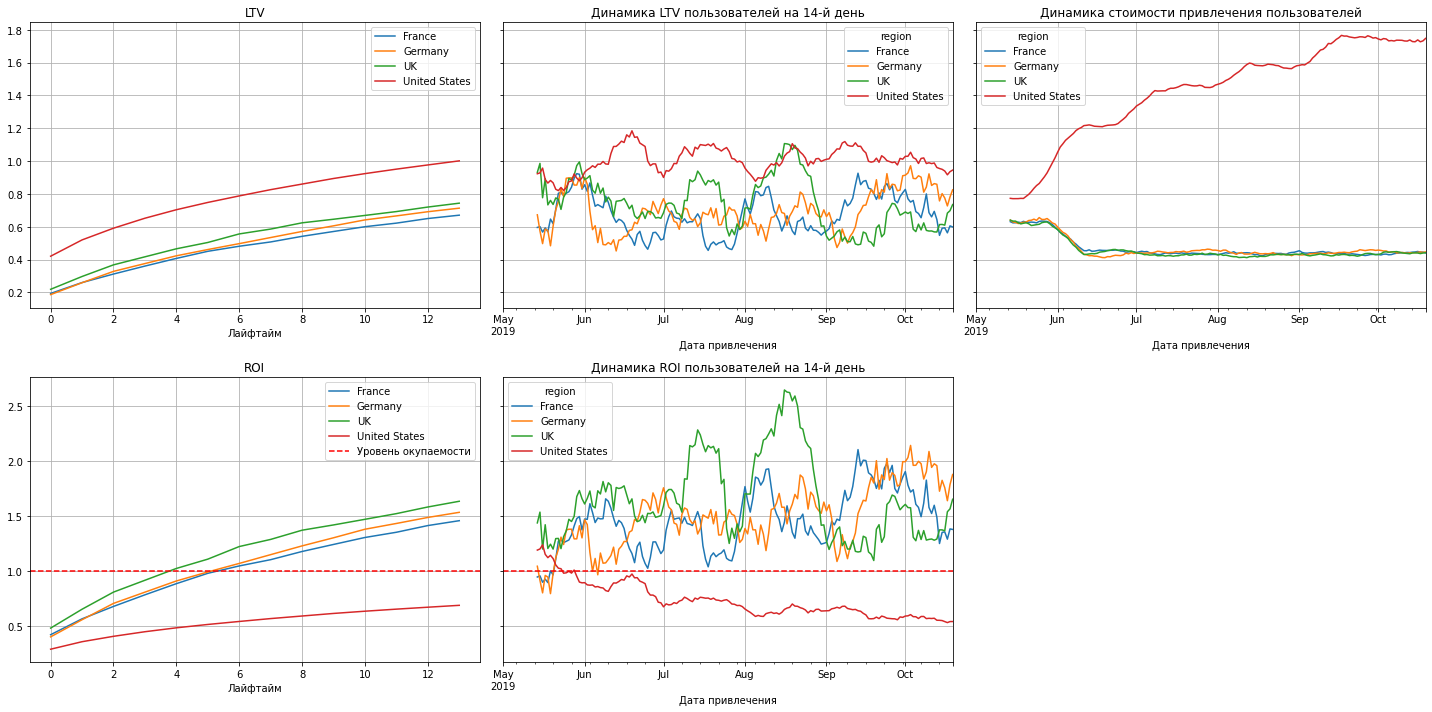

In [39]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders_no_organic, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод:**

- с середины мая большое количество рекламного бюджета стало уходить на США. поэтому в Европе реклама окупается уже к шестому дню, а в США не окупается совсем;

- при этом LTV США не так сильно отличается от остальных стран: 1 против 0,7;

- на графике динамика ROI пользователей на 14 день наблюдаются всплески у Великобритании в середине июля и в августе месяце.

##### Конверсия по странам

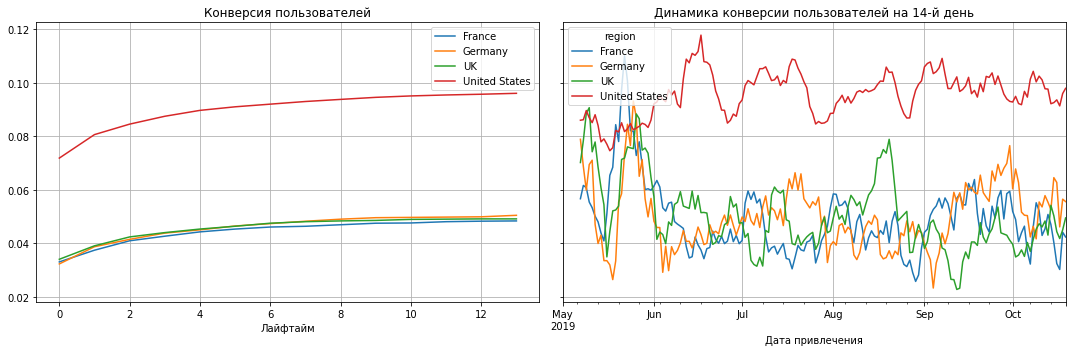

In [40]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders_no_organic, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**

- конверсия пользователей США в разы выше остальных стран;

- в европейских странах в середине мая наблюдается спад конверсии, а затем, к концу месяца резкий всплеск. 

##### Удержание по странам

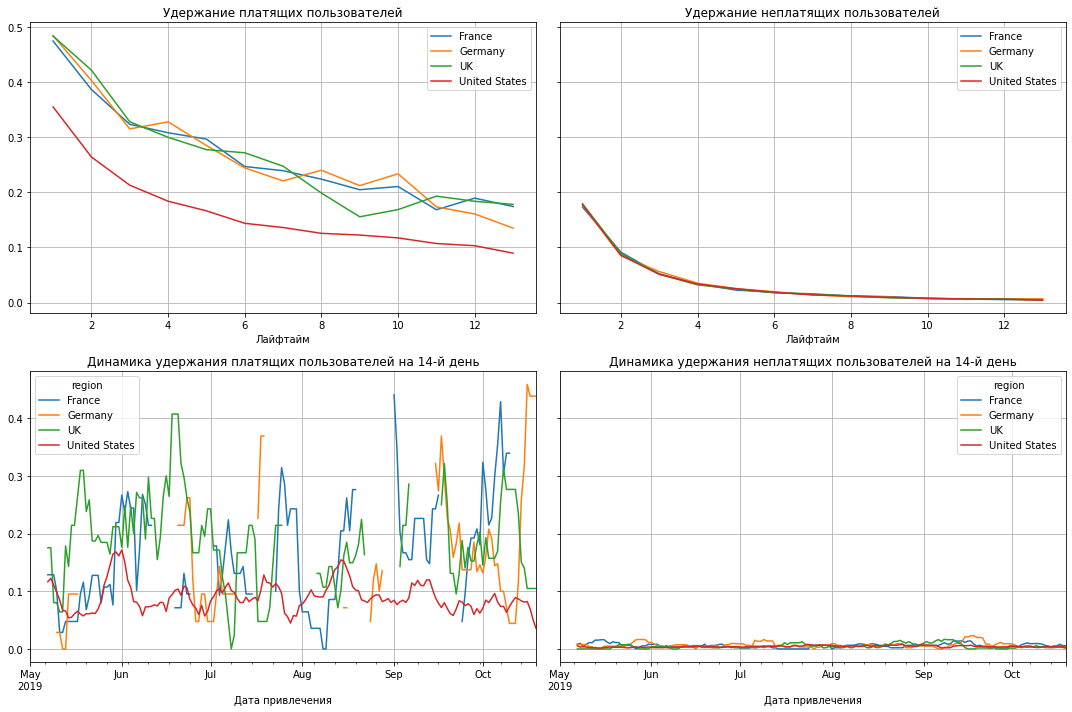

In [41]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits_no_organic, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**

- несмотря на высокую конверсию, динамика удержания платящих пользователей США намного ниже чем в остальных странах.

# Окупаемость рекламы с разбивкой по рекламным каналам

##### LTV и ROI

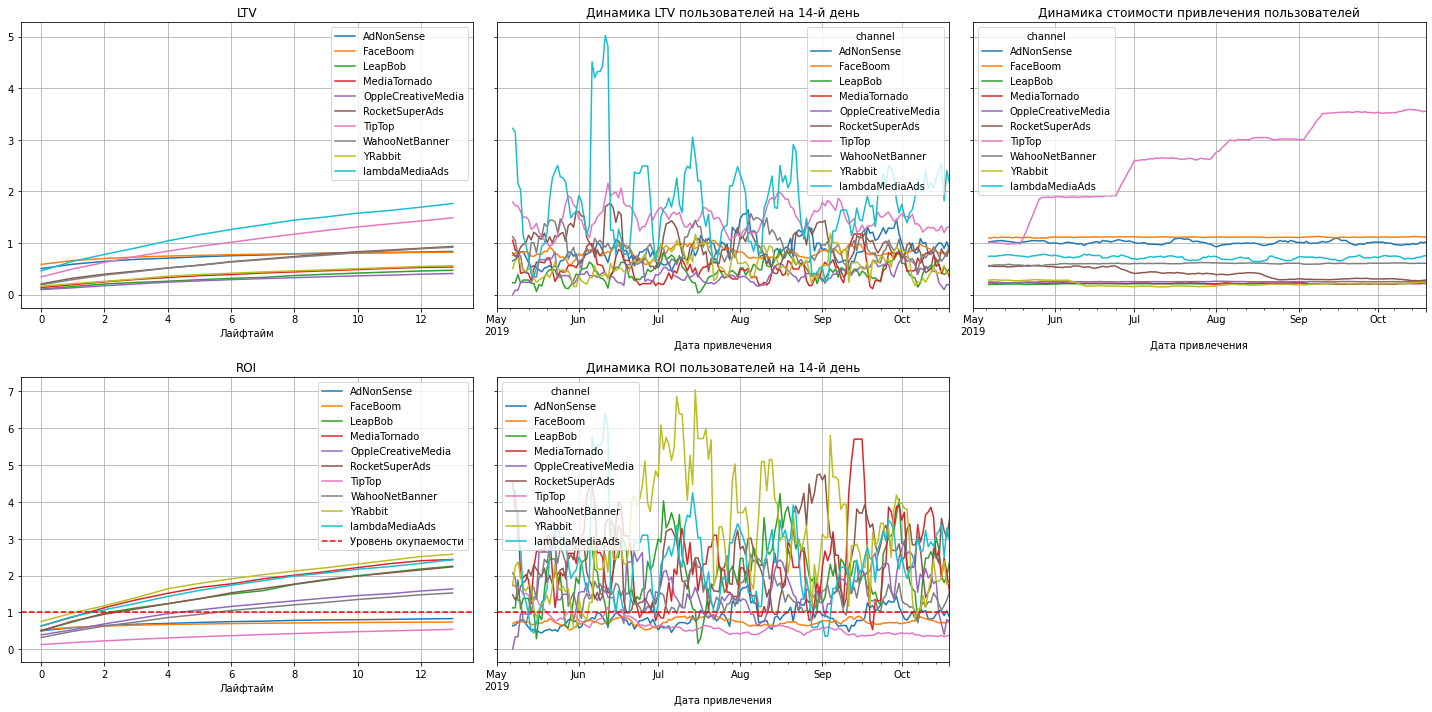

In [42]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

**Вывод:**

- LTV стабилен везде;

- на графике динамики LTV пользователей виден всплеск в начале июня для канала lambdaMediaAds;

- с середины мая динамика стоимости привлечения пользователей на канал Tip Top стала расти, поэтому реклама на этом канале не окупается;

- так же реклама не окупается на каналах FaceBoom и AdNonSense;

- на графике динамики ROI пользователей виден всплеск c середины июня по середину июля для канала YRabbit.

##### Конверсия по каналам

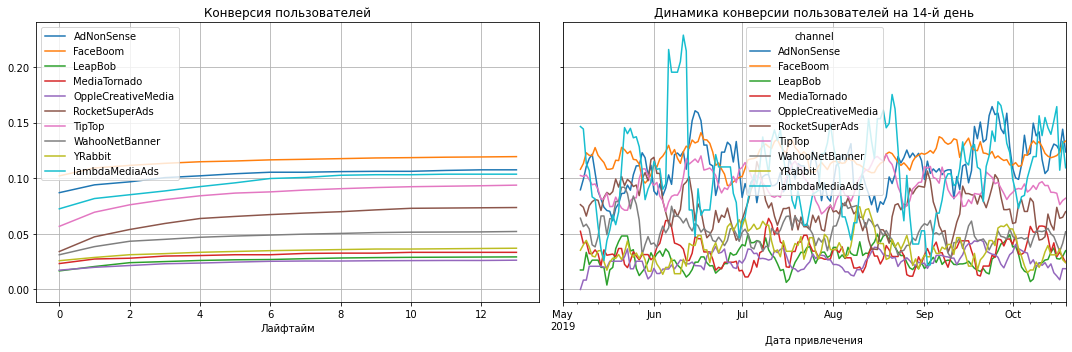

In [43]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders_no_organic, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**

- самая высокая конверсия у каналов FaceBoom, AdNonSense, lambdaMediaAds.

##### Удержание по каналам

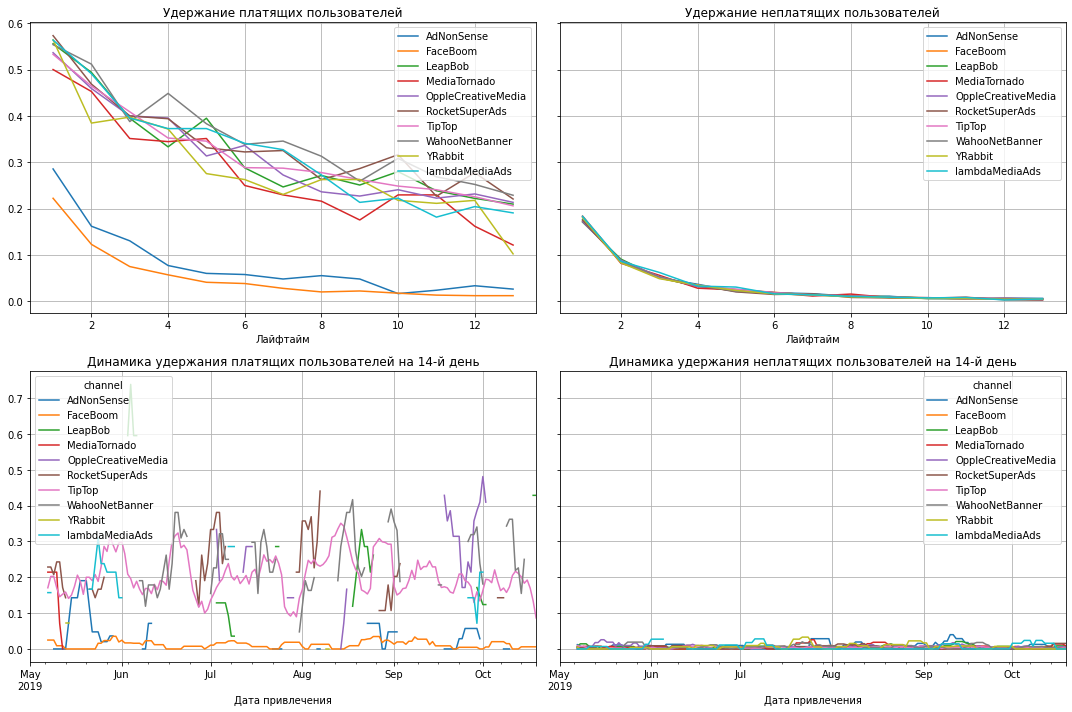

In [44]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits_no_organic, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**

- на графике видна проблема с удержанием платящих пользователей на каналах с самой высокой конверсией: FaceBoom, AdNonSense.

# Окупаемость рекламы с разбивкой по рекламным каналам для США и Европы

In [45]:
# Связь стран и каналов привлечения

region_channels = (
    profiles[profiles['payer']==True].pivot_table(index='channel', 
                                              columns = 'region', 
                                              values = 'user_id', 
                                              aggfunc='count')
    .reset_index()
    .sort_values('United States')
    .query('channel != "organic"')
)
region_channels

region,channel,France,Germany,UK,United States
3,MediaTornado,NaN,NaN,NaN,156.0
8,YRabbit,NaN,NaN,NaN,165.0
5,RocketSuperAds,NaN,NaN,NaN,352.0
6,TipTop,NaN,NaN,NaN,1878.0
1,FaceBoom,NaN,NaN,NaN,3557.0
0,AdNonSense,150.0,142.0,148.0,NaN
2,LeapBob,90.0,69.0,103.0,NaN
4,OppleCreativeMedia,80.0,64.0,89.0,NaN
7,WahooNetBanner,152.0,148.0,153.0,NaN
9,lambdaMediaAds,82.0,67.0,76.0,NaN


**Вывод:**

- Каналы MediaTornado, YRabbit, RocketSuperAds, TipTop, FaceBoom относятся к США;

- Каналы AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner и lambdaMediaAds к Европе.

In [46]:
# сохраним списки каналов для США и Европы

usa_channels = region_channels.loc[region_channels['United States'] > 0,'channel']
eu_channels = region_channels.loc[region_channels['France'] > 0,'channel']

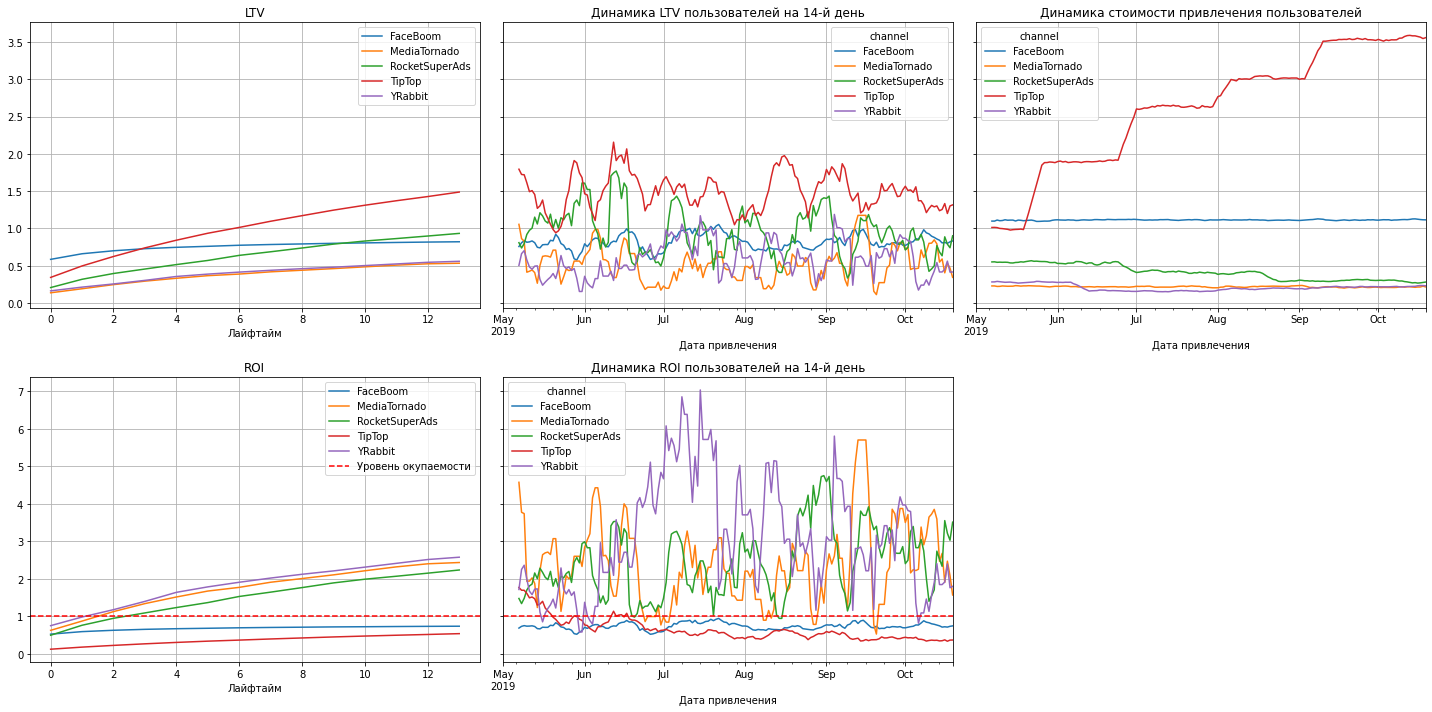

In [47]:
# окупаемость каналов США

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic.query('channel in @usa_channels'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

**Вывод:**

- LTV стабилен везде;

- САС у канала Tip Top скачкообразно растет с середины мая, у остальных каналов он стабилен;

- реклама окупается к третьему дню у каналов MediaTornado, YRabbit, RocketSuperAds. У TipTop, FaceBoom не окупается вообще. 

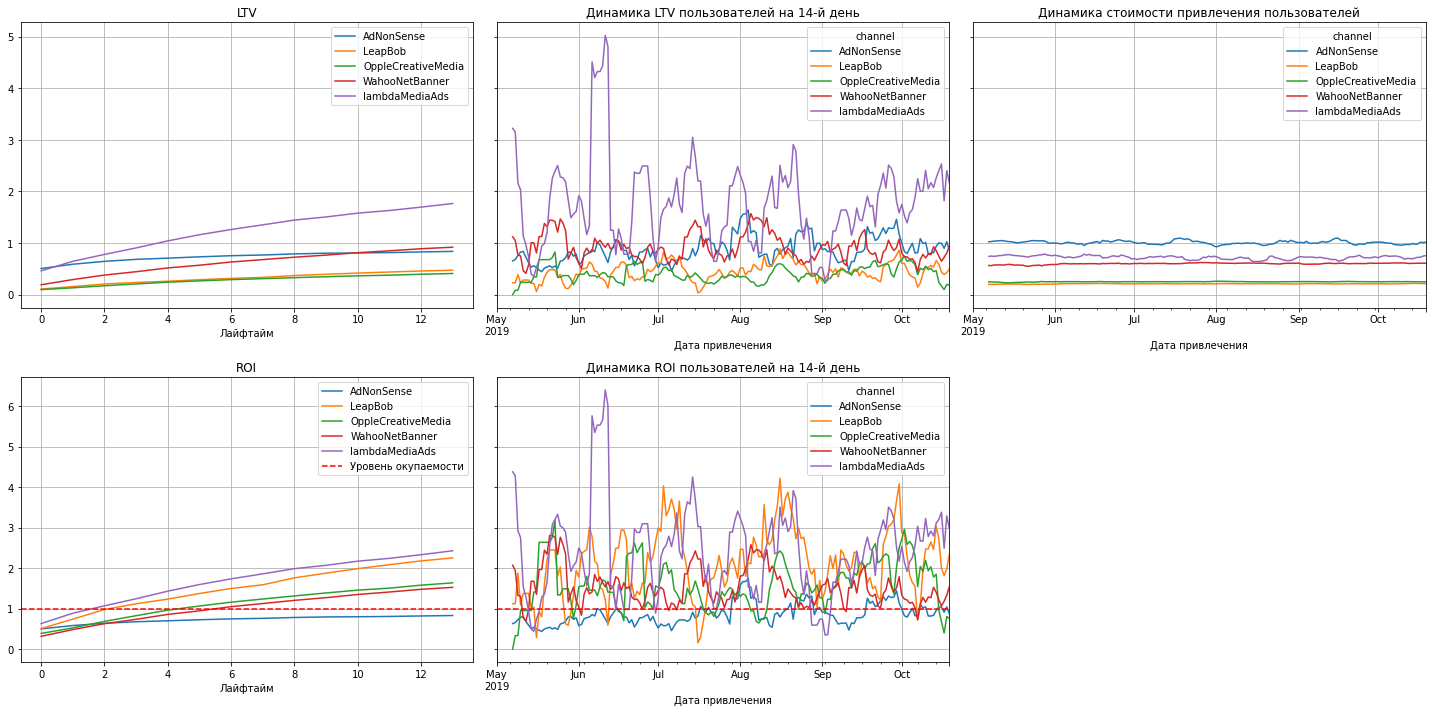

In [48]:
# окупаемость каналов Европы

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic.query('channel in @eu_channels'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

**Вывод:**

- LTV стабилен везде;

- САС стабилен для всех каналов;

- реклама не окупается только у AdNonSense.

**Выводы по 5 разделу:**

***1. Рассчитана общая окупаемость рекламы:*** 

- LTV стабилен в динамике и растет с увеличением лайфтаймов;

- CAC не стабилен и растет скачкообразно, значит увеличивается рекламный бюджет;

- Реклама не окупается так как ROI к концу второй недели около 80%;

- До середины июня реклама окупалась, далее ROI начал падать и в ноябре показатели достиги 60 %.
 
---
***2. Рассчитана конверсия и удержание пользователей:***

- по графиках по конверсии и удержанию пользователей нет ничего необычного.

---

***3. Рассчитана окупаемость рекламы с разбивкой по устройствам:***

- пользователи PC окупаются на 11 день, при этом на них тратится меньше всего рекламного бюджета;

- хуже всех окупаются владельцы Mac и iPhone;

- показатель LTV стабилен для всех устройств;

- динамика ROI пользователей на 14-й день к октябрю снижается для всех устройств ниже 100 %;

- лучше всего конверсия растет у Mac и iPhone;


---

***4. Рассчитана окупаемость рекламы с разбивкой по странам:***

- с середины мая большое количество рекламного бюджета стало уходить на США. поэтому в Европе реклама окупается уже к шестому дню, а в США не окупается совсем. При этом LTV США не так сильно отличается от остальных стран: 1 против 0,7;

-  на графике динамика ROI пользователей на 14 день наблюдаются всплески у Великобритании в середине июля и в августе месяце.

- конверсия пользователей США в разы выше остальных стран;

- в европейских странах в середине мая наблюдается спад конверсии, а затем, к концу месяца резкий всплеск.

- несмотря на высокую конверсию, динамика удержания платящих пользователей США намного ниже чем в остальных странах.

---

***5. Рассчитана окупаемость рекламы с разбивкой по рекламным каналам:***

-  LTV стабилен везде;

- на графике динамики LTV пользователей виден всплеск в начале июня для канала lambdaMediaAds;

- с середины мая динамика стоимости привлечения пользователей на канал Tip Top стала расти, поэтому реклама на этом канале не окупается;

- так же реклама не окупается на каналах FaceBoom и AdNonSense;

- на графике динамики ROI пользователей виден всплеск c середины июня по середину июля для канала YRabbit.

- самая высокая конверсия у каналов FaceBoom, AdNonSense, lambdaMediaAds.

- обнаружена проблема с удержанием платящих пользователей на каналах с самой высокой конверсией: FaceBoom, AdNonSense.

---
***6. Рассчитана окупаемость рекламы с разбивкой по рекламным каналам для США и Европы:***


**для США:**

- LTV стабилен везде;

- САС у канала Tip Top скачкообразно растет с середины мая, у остальных каналов он стабилен;

- реклама окупается к третьему дню у каналов MediaTornado, YRabbit, RocketSuperAds. У TipTop, FaceBoom не окупается вообще. 


**для Европы:**


- LTV стабилен везде;

- САС стабилен для всех каналов;

- реклама не окупается только у AdNonSense.

---
**Можно сделать вывод, что реклама не окупается (общий ROI ниже 100 %).**

**Факторы влияющие на окупаемость:**

- увеличение рекламного бюджета на привлечение пользователей из США и канала Tip Top.

- проблема с удержанием платящих пользователей на каналах с самой высокой конверсией FaceBoom и AdNonSense.


---
**Основные рекомендации:**

- сократить рекламные расходы на привлечение пользователей США из рекламного канала Tip Top;

- увеличить рекламный бюджет для перспективных каналов для США - RocketSuperAds, для Европы - lamdaMediaAds;

- исключить техническую ошибку (проблему) с удержанием пользователей на каналах FaceBoom и AdNonSense.


# 6. Общий вывод

***В ходе исследования причин убыточности развлекательного приложения Procrastinate Pro+ были выполнены следующие этапы и сделаны выводы:***

--- 
**Общая информация, предобработка данных:**

Были проанализированны  и подготовлены к дальнейшему исследованию данные о визитах, заказах и рекламных расходах:

- проведена проверка на пропуски, пропуски отсутствуют;

- название столбцов приведено к "snake_case".

- изменили тип данных колоннок с датами на соответствующий;

- провели проверку на явные дубликаты - явных дубликатов не обнаружено;

- Провели проверку на неявные дубликаты - неявных дубликатов нет.

---
**Для проведения исследования были заданы 8 функций:**

1. Это функции для вычисления значений метрик:

- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.


2. А также функции для построения графиков:

- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

---
**Исследовательский анализ данных:** 

***Было проведено четыре исследования***

- ***1. Профили пользователей. Минимальная и максимальная даты привлечения пользователей***


  - Составлены пользовательские профили, которые содержат следующую информацию:

    ***first_ts*** - дату первого привлечения каждого пользователя

    ***channel*** - канал привлечения

    ***device*** - устройство

    ***region*** - регион

    ***payer*** - стал ли пользователь покупателем

    ***acquisition_cost*** - стоимость привлечения клиента (organic: стоимость равна нулю)
    

  - минимальная дата привлечения пользователей: 01.05.2019
  

  - максимальная дата привлечения пользователей: 27.10.2019
  
- ***2. Проведен анализ пользователей по странам:***

  - в приложение приходят пользователи из США, Франции, Германии и Великобритании;

  - подавляющее число пользователей из США;

  - самая высокая доля платящих пользователей тоже из США.
  
- ***3. Проведен анализ пользователей по устройствам:***

  - клиенты пользуются Mac, iPhone, PC, 'Android'.

  - большинство пользователей предпочитают iPhone;

  - доля платящих пользователей выше у владельцев Mac.
  
- ***4. Проведен анализ пользователей по рекламным каналам:***

  - всего рекламных каналов 11, включая organic (пользователи, которые пришли без рекламы);

  - большинство пользователей первый раз пришли без рекламы, однако доля платящих у них самая низкая;

  - самая высокая доля платящих у пользователей привлеченных через каналы FaceBoom, AdNonSense, lambdaMediaAds.
  
---
**Маркетинг**

***1. Рассчитана общая сумма расходов на маркетинг:*** 

- всего на рекламу потрачено 105497 y.e
 

***2. Выяснено, как траты распределены по рекламным источникам:***

- самые дорогие каналы привлечения TipTop и FaceBoom.



***3.  Визуализирована динамика изменения расходов во времени по каждому источнику:***

- начиная с 20 - 21 недели (май) началось увеличение расходов по каналам TipTop и FaceBoom;

- пик расходов приходится на 38 - 39 неделю (сентябрь);

- у остальных каналов резких скачков расходов на рекламу не наблдается.



***4. Рассчитан САС для каждого рекламного источника:***

- самый дорогой канал по привлечению пользователей TipTop: стоимость привлечения одного пользователя 2.80 y.e;

- на втором и третьем месте каналы FaceBoom и AdNonSense: стоимость привлечения одного пользователя 1.11 и 1.01 y.e соотвественно;

- остальные каналы берут от 0.72 до 0.21 y.e;

- organic: бесплатный трафик, его стоимость равна нулю.


---
**Оценка окупаемости рекламы**


***1. Рассчитана общая окупаемость рекламы:*** 

- LTV стабилен в динамике и растет с увеличением лайфтаймов;

- CAC не стабилен и растет скачкообразно, значит увеличивается рекламный бюджет;

- Реклама не окупается так как ROI к концу второй недели около 80%;

- До середины июня реклама окупалась, далее ROI начал падать и в ноябре показатели достиги 60 %.
 
---
***2. Рассчитана конверсия и удержание пользователей:***

- по графиках по конверсии и удержанию пользователей нет ничего необычного.

---

***3. Рассчитана окупаемость рекламы с разбивкой по устройствам:***

- пользователи PC окупаются на 11 день, при этом на них тратится меньше всего рекламного бюджета;

- хуже всех окупаются владельцы Mac и iPhone;

- показатель LTV стабилен для всех устройств;

- динамика ROI пользователей на 14-й день к октябрю снижается для всех устройств ниже 100 %;

- лучше всего конверсия растет у Mac и iPhone;


---

***4. Рассчитана окупаемость рекламы с разбивкой по странам:***

- с середины мая большое количество рекламного бюджета стало уходить на США. поэтому в Европе реклама окупается уже к шестому дню, а в США не окупается совсем. При этом LTV США не так сильно отличается от остальных стран: 1 против 0,7;

-  на графике динамика ROI пользователей на 14 день наблюдаются всплески у Великобритании в середине июля и в августе месяце.

- конверсия пользователей США в разы выше остальных стран;

- в европейских странах в середине мая наблюдается спад конверсии, а затем, к концу месяца резкий всплеск.

- несмотря на высокую конверсию, динамика удержания платящих пользователей США намного ниже чем в остальных странах.

---

***5. Рассчитана окупаемость рекламы с разбивкой по рекламным каналам:***

-  LTV стабилен везде;

- на графике динамики LTV пользователей виден всплеск в начале июня для канала lambdaMediaAds;

- с середины мая динамика стоимости привлечения пользователей на канал Tip Top стала расти, поэтому реклама на этом канале не окупается;

- так же реклама не окупается на каналах FaceBoom и AdNonSense;

- на графике динамики ROI пользователей виден всплеск c середины июня по середину июля для канала YRabbit.

- самая высокая конверсия у каналов FaceBoom, AdNonSense, lambdaMediaAds.

- обнаружена проблема с удержанием платящих пользователей на каналах с самой высокой конверсией: FaceBoom, AdNonSense.

---
***6. Рассчитана окупаемость рекламы с разбивкой по рекламным каналам для США и Европы:***


**для США:**

- LTV стабилен везде;

- САС у канала Tip Top скачкообразно растет с середины мая, у остальных каналов он стабилен;

- реклама окупается к третьему дню у каналов MediaTornado, YRabbit, RocketSuperAds. У TipTop, FaceBoom не окупается вообще. 


**для Европы:**


- LTV стабилен везде;

- САС стабилен для всех каналов;

- реклама не окупается только у AdNonSense.


---

***Возможные причины неэффективности привлечения пользователей:***

- Резкий рост затрат на рекламу на канале TipTop начиная с середины мая;

- Проблема с удержанием платящих пользователей на каналах с самой высокой конверсией: FaceBoom, AdNonSense;

- В общем итоге, показатель ROI всех трех каналов значительно ниже уровеня окупаемости.


---
***Рекомендации для отдела маркетинга:***

- Уменьшить затраты на рекламу на канале TipTop до уровня начала мая 2019 года;

- Исключить техническую ошибку (проблему) с удержанием платящих пользователей на каналах FaceBoom и AdNonSense;

- Увеличить рекламный бюджет для перспективных каналов для США - RocketSuperAds, для Европы - lamdaMediaAds: так как на этих каналах высокие показателели LTV, конверсии и ROI.